# Taining and Updating models

## Why update the model?
- Better results on your specific domain
- Learn classification schemes specifically for your problem 
- Essential for text classification
- Very useful for named entity recognition
- Less critical for part-of-speech tagging and dependency parsing

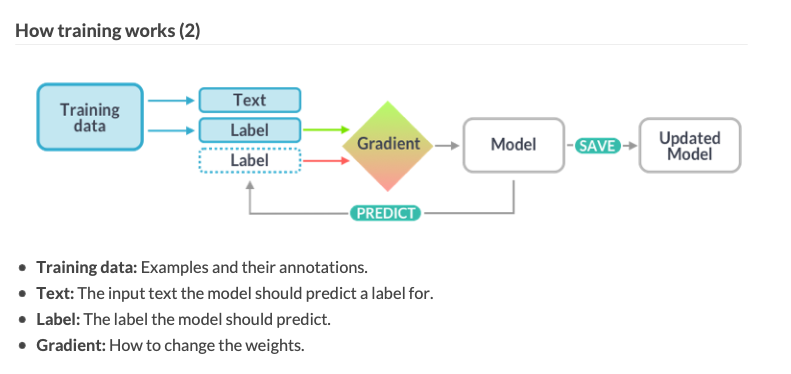

In [2]:
import spacy
import random
from spacy.tokens import Span
from spacy.tokens import DocBin

In [3]:
nlp = spacy.blank("en") #Creates a blank English nlp object

In [4]:
doc = nlp("iPhone X is coming")
doc.ents = [Span(doc, 0, 2, label = "GADGET")]

In [5]:
doc2 = nlp("I need a new phone! Any tips?")
docs = [doc, doc2]

In [6]:
random.shuffle(docs)
train_docs = docs[:len(doc) // 2]
dev_docs = docs[len(docs) // 2:]

In [7]:
# Create and save a collection of training docs
train_docbin = DocBin(docs = train_docs)
train_docbin.to_disk("./train.spacy")

#Create and save a collection of testing docs
dev_docbin = DocBin(docs = dev_docs)
dev_docbin.to_disk("./dev.spacy")

In [8]:
import json
import spacy
from spacy.matcher import Matcher
from spacy.tokens import Span

TEXTS = ["How to preorder the iPhone X",
  "iPhone X is coming",
  "Should I pay $1,000 for the iPhone X?",
  "The iPhone 8 reviews are here",
  "iPhone 11 vs iPhone 8: What's the difference?",
  "I need a new phone! Any tips?"]

nlp = spacy.blank("en")
matcher = Matcher(nlp.vocab)

# Two tokens whose lowercase forms match "iphone" and "x"
pattern1 = [{"LOWER": "iphone"}, {"LOWER": "x"}]

# Token whose lowercase form matches "iphone" and a digit
pattern2 = [{"LOWER": "iphone"}, {"IS_DIGIT": True}]

# Add patterns to the matcher and create docs with matched entities
matcher.add("GADGET", [pattern1, pattern2])
docs = []
for doc in nlp.pipe(TEXTS):
    matches = matcher(doc)
    spans = [Span(doc, start, end, label=match_id) for match_id, start, end in matches]
    print(spans)
    doc.ents = spans
    docs.append(doc)

[iPhone X]
[iPhone X]
[iPhone X]
[iPhone 8]
[iPhone 11, iPhone 8]
[]


In [10]:
import spacy

doc = nlp("iPhone 11 vs iPhone 8: What's the difference?")
print(doc.ents)

()
